# **Team 10 - BOP Data Analysis**

**Code by  Sara, Bahar, Andrew, Noah, Jakob, Abnerline**

Mentor: Swetha

**(Pizza Pandas)**

**Research question:** How does the dissolved oxygen level of water affect oyster growth?


In [ ]:
# Load libraries
%matplotlib notebook
import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('bop_data_retrivedbyian.csv')

# finding outlier max and min limits
outliersLow = 25. - 1.5*(40. - 25.)
outliersHigh = 40. + 1.5*(40. - 25.)

data.head()
data.shape

(1097, 50)

In [ ]:
vals = data[['dissolvedOxygen_average', 'sizeOfLiveOysterMM']]
row, col = vals.shape

for x in range(row):
  if vals.iloc[x]['sizeOfLiveOysterMM'] < outliersLow or vals.iloc[x]['sizeOfLiveOysterMM'] > outliersHigh:
    vals.iloc[x]['sizeOfLiveOysterMM'] = np.nan
  if vals.iloc[x]['dissolvedOxygen_average'] == 77.3:
    vals.iloc[x]['dissolvedOxygen_average'] = np.nan
  vals.iloc[x]['dissolvedOxygen_average'] = round(vals.iloc[x]['dissolvedOxygen_average'], 2)

vals = vals.dropna()

oxygenAverage = pd.Series(vals.iloc[:, col - 2]).astype(float)
oysterSizes = pd.Series(vals.iloc[:, col - 1]).astype(float)

vals = pd.DataFrame({'Average Dissolved Oxygen (mgl)': oxygenAverage.values, 'Average Oyster Size (mm)': oysterSizes.values})
vals = pd.DataFrame(vals).dropna()

vals.groupby('Average Dissolved Oxygen (mgl)').mean().round(4)

,Average Oyster Size (mm)
Average Dissolved Oxygen (mgl),
4.00,29.6067
4.17,37.3514
4.33,29.0532
4.50,25.2941
5.00,32.1197
5.33,40.3590
5.67,30.7849
6.00,40.6385
7.00,30.8091


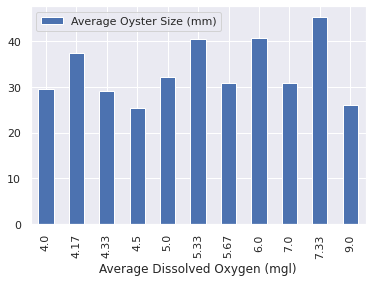

In [ ]:
vals.groupby('Average Dissolved Oxygen (mgl)').mean().plot.bar()

In [ ]:
valsTEMP = pd.DataFrame({'Average Dissolved Oxygen (mgl)': oxygenAverage.values, 'Oyster Size (mm)': oysterSizes.values})
valsTEMP = pd.DataFrame(valsTEMP).dropna()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


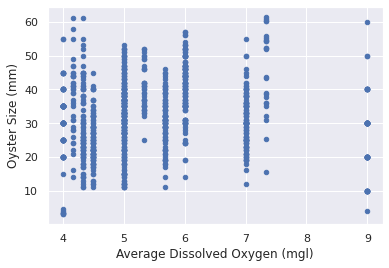

In [ ]:
valsTEMP.plot.scatter(y = 'Oyster Size (mm)', x = 'Average Dissolved Oxygen (mgl)')

In [ ]:
np.corrcoef(vals['Average Dissolved Oxygen (mgl)'], vals['Average Oyster Size (mm)'])

array([[1.        , 0.06835076],
       [0.06835076, 1.        ]])

In [ ]:
corrcoef, pval = sp.stats.pearsonr(vals['Average Dissolved Oxygen (mgl)'], vals['Average Oyster Size (mm)'])
print(f'corrcoef = {corrcoef:.4f}\t\tp-value = {pval:.4f}')

corrcoef = 0.0684		p-value = 0.0305
